# Data Mining Project

## Data Exploration

Analisar awards, coaches, players e players_teams


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

DATA_PATH = 'data'
DATA_TEAMS = 'teams.csv'
DATA_COACHES = 'coaches.csv'
DATA_AWARDS = 'awards_players.csv'
DATA_PLAYERS = 'players.csv'
DATA_PLAYERS_TEAMS = 'players_teams.csv'
DATA_SERIES_POST = 'series_post.csv'
DATA_TEAMS_POST = 'teams_post.csv'

In [3]:
# Read the CSV files into data frames
awards_df = pd.read_csv(f'{DATA_PATH}/{DATA_AWARDS}')
coaches_df = pd.read_csv(f'{DATA_PATH}/{DATA_COACHES}')
players_df = pd.read_csv(f'{DATA_PATH}/{DATA_PLAYERS}')
players_teams_df = pd.read_csv(f'{DATA_PATH}/{DATA_PLAYERS_TEAMS}')
teams_df = pd.read_csv(f'{DATA_PATH}/{DATA_TEAMS}')
teams_post_df = pd.read_csv(f'{DATA_PATH}/{DATA_TEAMS_POST}')
series_post_df = pd.read_csv(f'{DATA_PATH}/{DATA_SERIES_POST}')

## Awards Table

In [4]:
# Display the first few rows of the dataset
#print(awards_df.head())

# Get information about the columns and data types
print(awards_df.info())

# Check for missing values
print(awards_df.isnull().sum())

# Get basic statistics of numerical columns
#print(awards_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  95 non-null     object
 1   award     95 non-null     object
 2   year      95 non-null     int64 
 3   lgID      95 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.1+ KB
None
playerID    0
award       0
year        0
lgID        0
dtype: int64


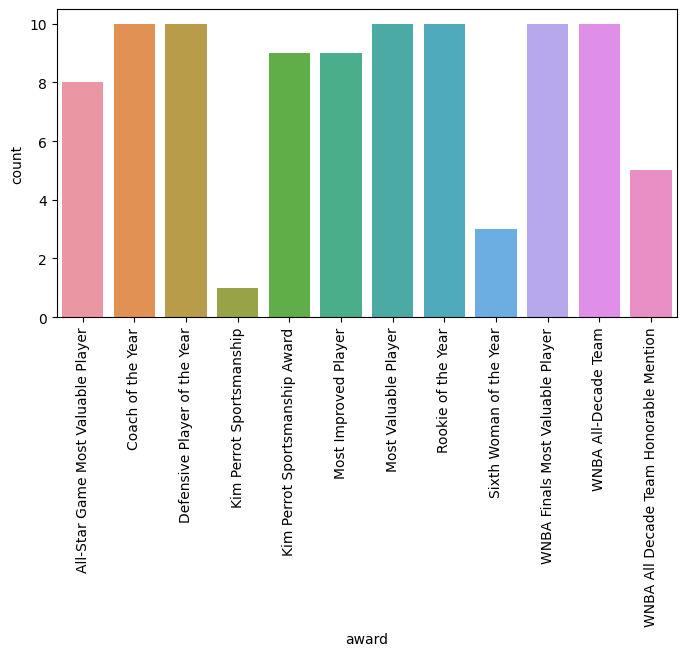

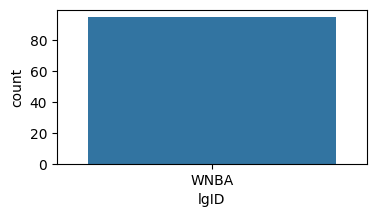

In [13]:
# Plot count plots for award
plt.figure(figsize=(8, 4))
sb.countplot(x='award', data=awards_df)
plt.xticks(rotation=90)
plt.show()

# Plot count plots for lgID
plt.figure(figsize=(4, 2))
sb.countplot(x='lgID', data=awards_df)
plt.show()

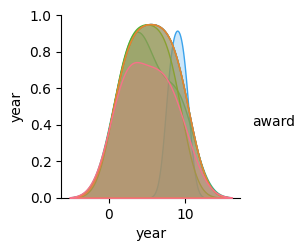

In [44]:
%matplotlib inline
sb.pairplot(awards_df, hue ='award')

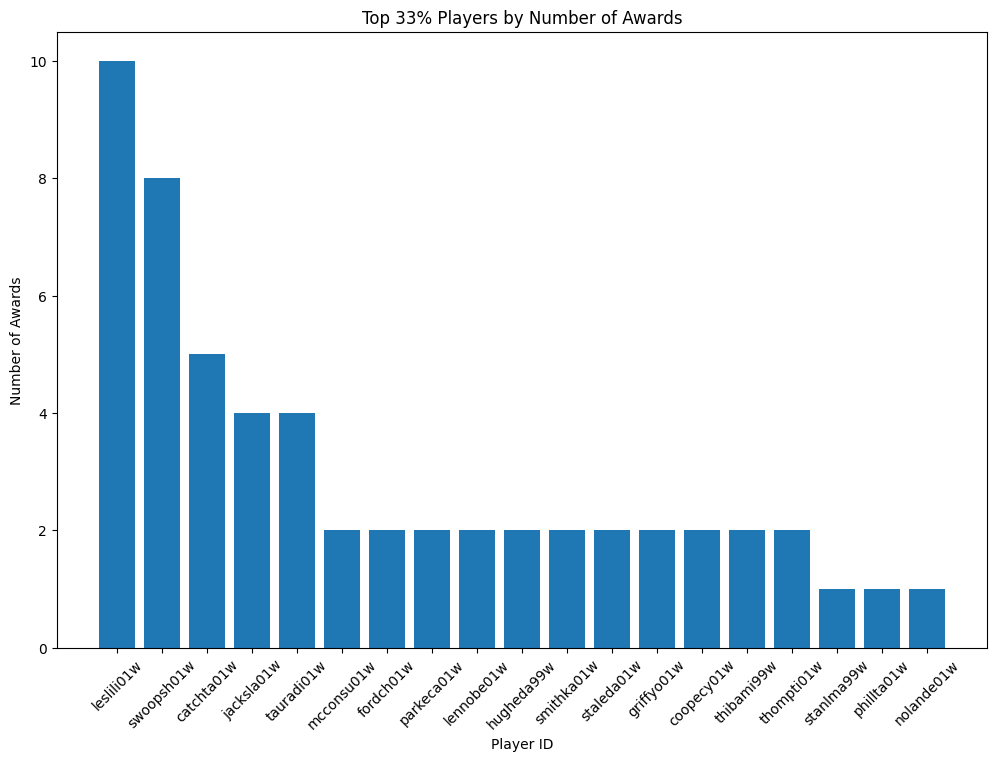

In [45]:
# Group by playerID and count the number of awards
award_counts = awards_df.groupby("playerID")["award"].count().reset_index()

# Sort players by the number of awards in descending order
award_counts = award_counts.sort_values(by="award", ascending=False)

# Calculate the number of players in the top 20%
top_33_percent = int(0.33 * len(award_counts))

# Select the top 20% of players
top_players = award_counts.head(top_33_percent)

# Create a bar plot for the top 20% of players
plt.figure(figsize=(12, 8))
plt.bar(top_players["playerID"], top_players["award"])
plt.xlabel("Player ID")
plt.ylabel("Number of Awards")
plt.title("Top 33% Players by Number of Awards")
plt.xticks(rotation=45)
plt.show()

### Information about awards
lgID has only the value "WNBA" (useless)<br>
Table does not have null/missing values<br>
leslili01w is the player with most awards (10).


## Coaches

#### Basic Info 

In [46]:
# Display the first few rows of the dataset
#print(coaches_df.head())

# Get information about the columns and data types (missing values)
print(coaches_df.info())

# Get basic statistics of numerical columns
print(coaches_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   coachID      162 non-null    object
 1   year         162 non-null    int64 
 2   tmID         162 non-null    object
 3   lgID         162 non-null    object
 4   stint        162 non-null    int64 
 5   won          162 non-null    int64 
 6   lost         162 non-null    int64 
 7   post_wins    162 non-null    int64 
 8   post_losses  162 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 11.5+ KB
None
             year       stint         won        lost   post_wins  post_losses
count  162.000000  162.000000  162.000000  162.000000  162.000000   162.000000
mean     5.314815    0.364198   14.672840   14.623457    1.166667     1.172840
std      2.896715    0.693861    6.403445    5.678789    1.953656     1.316782
min      1.000000    0.000000    0.000000    2.000000    0.000000     0.0

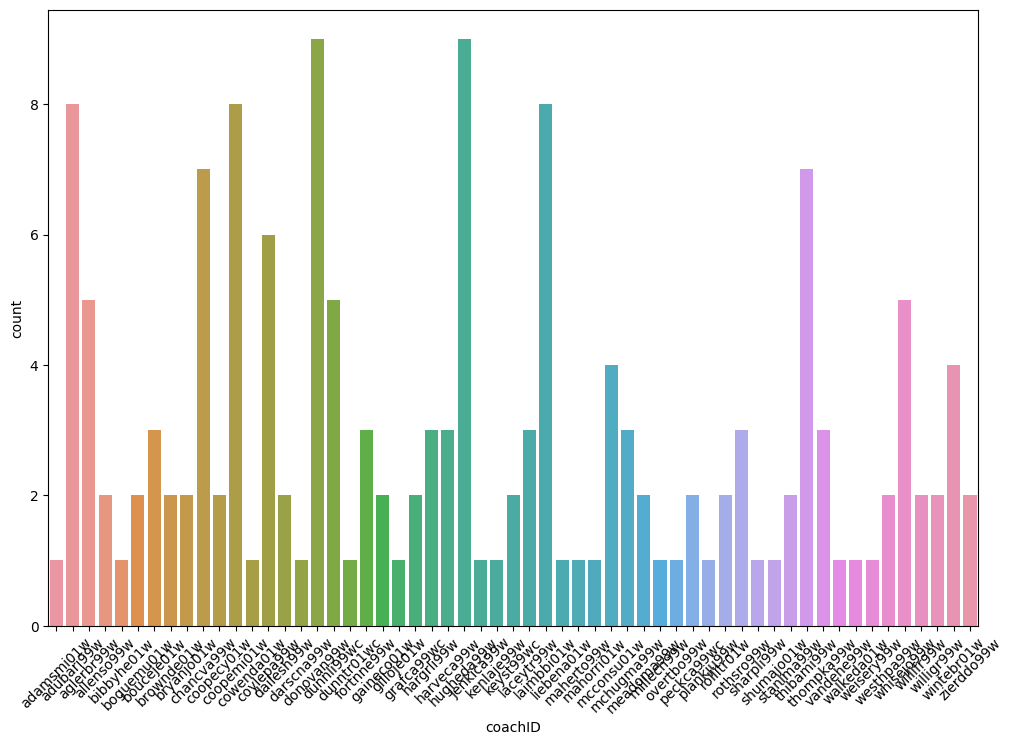

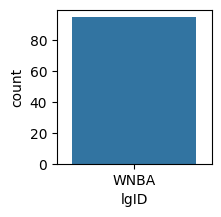

In [17]:
# Plot count plots for award
plt.figure(figsize=(12, 8))
sb.countplot(x='coachID', data=coaches_df)
plt.xticks(rotation=45)
plt.show()

# Plot count plots for lgID
plt.figure(figsize=(2, 2))
sb.countplot(x='lgID', data=awards_df)
plt.show()

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_16260\1699120056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = coaches_df.corr()


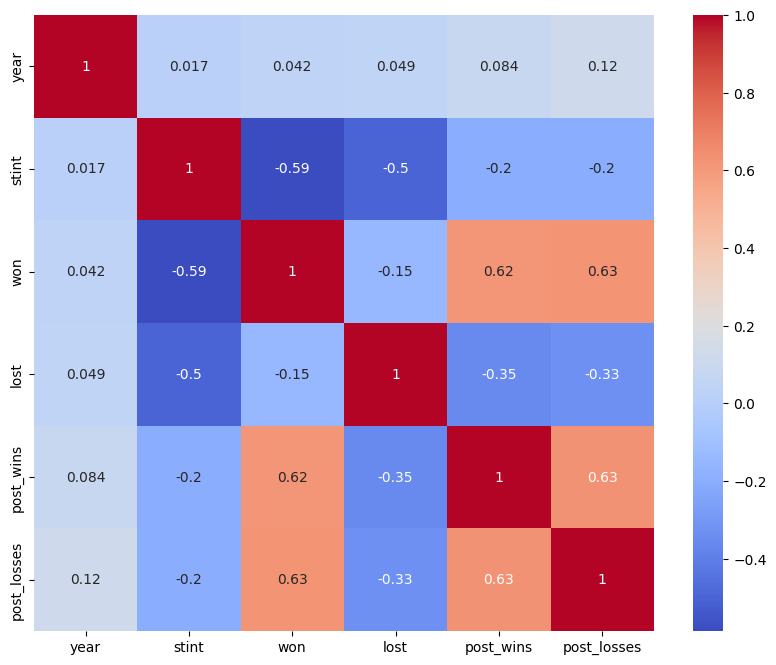

In [48]:
# Calculate the correlation matrix
correlation_matrix = coaches_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

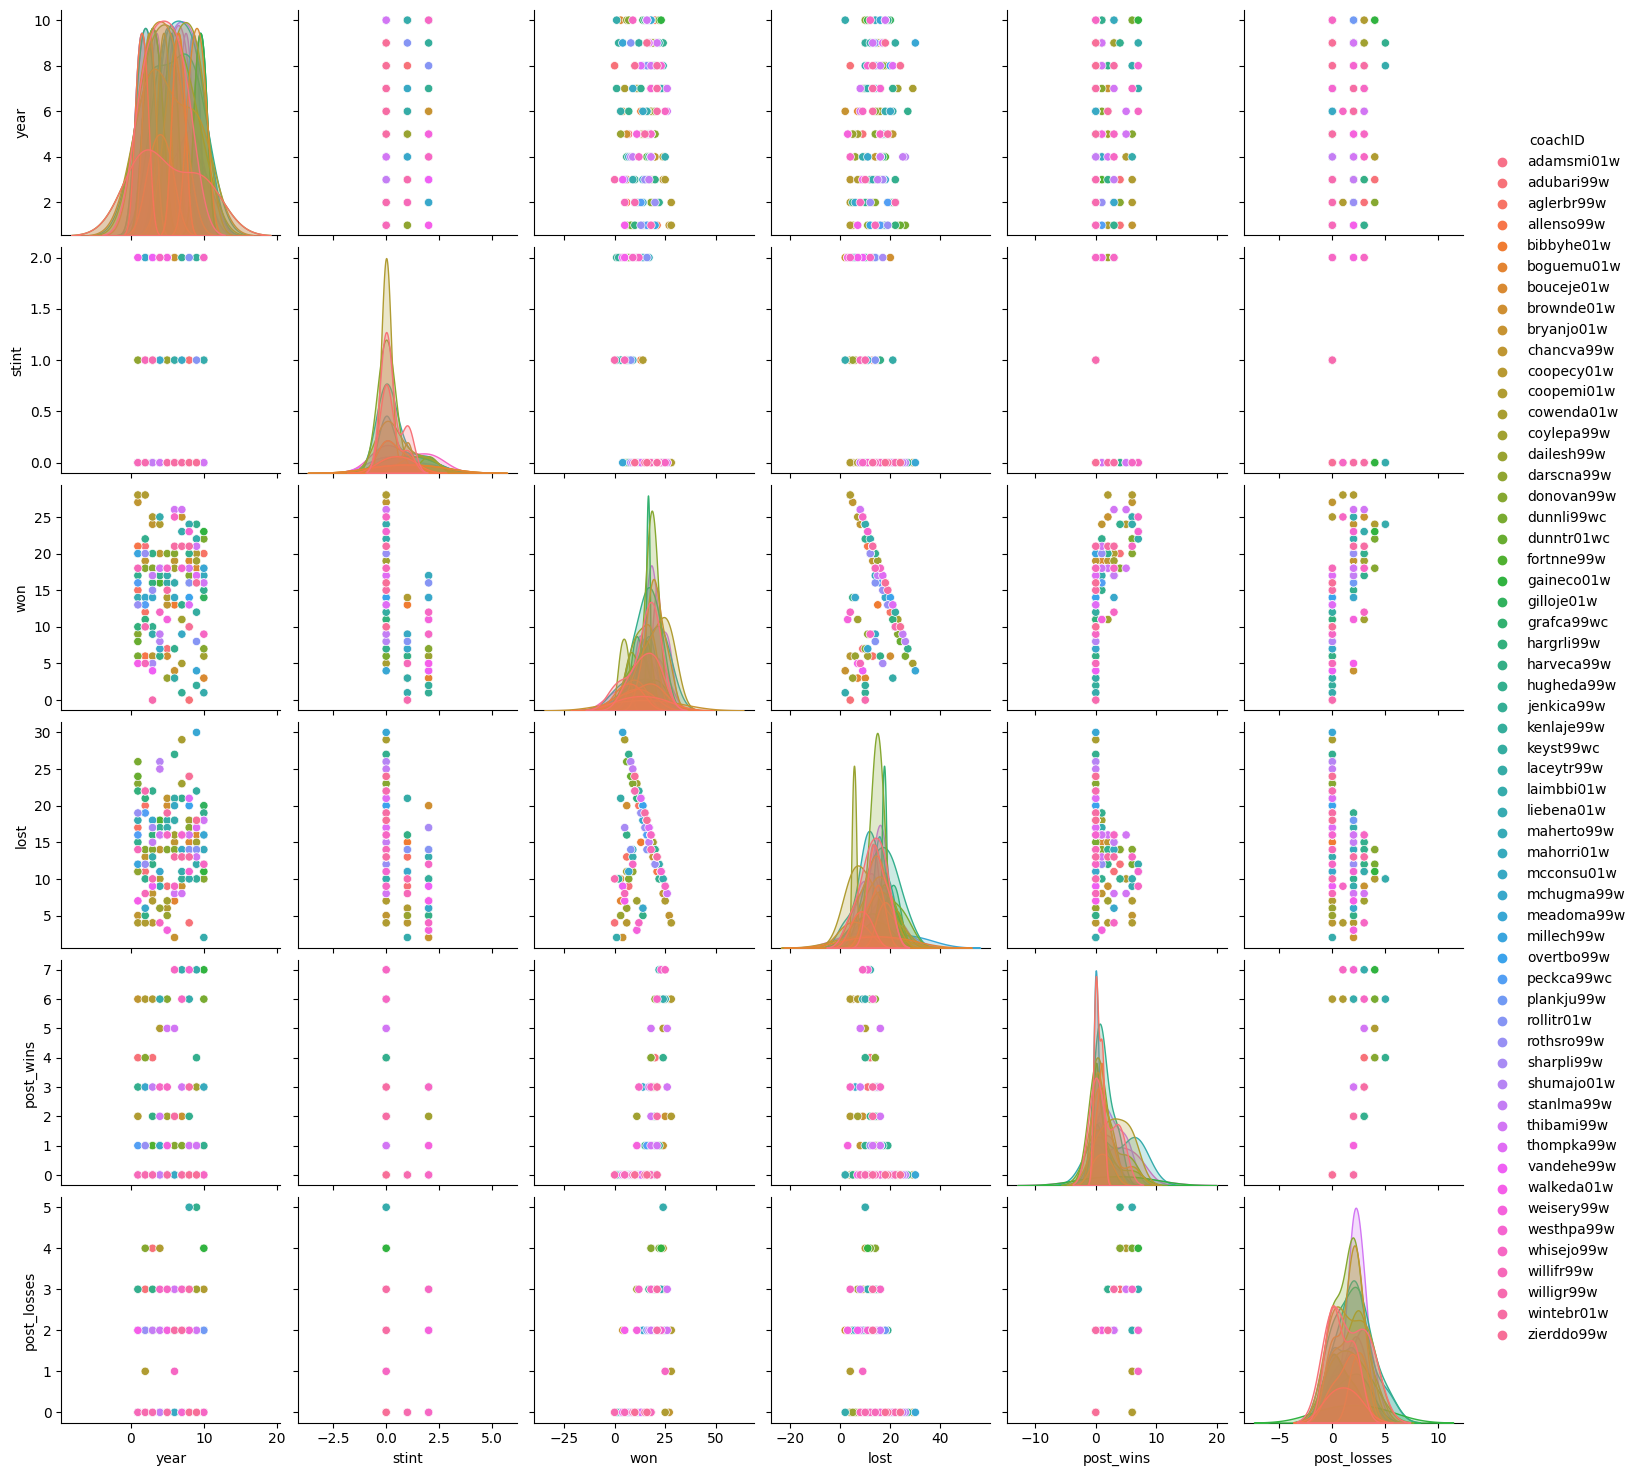

In [49]:
# %matplotlib inline
# sb.pairplot(coaches_df, hue ='coachID')

#USELESS

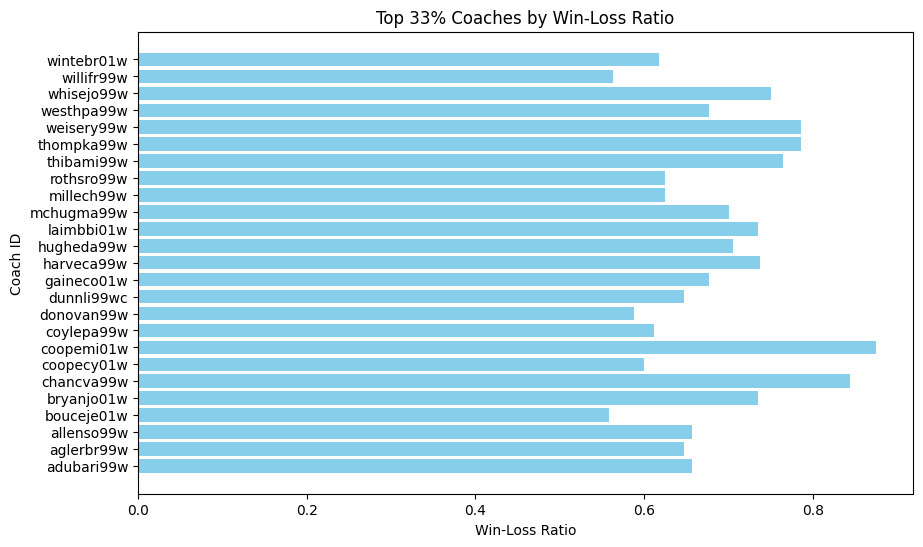

In [50]:
import matplotlib.pyplot as plt

# Calculate win-loss ratio for each coach
coaches_df["win_loss_ratio"] = coaches_df["won"] / (coaches_df["won"] + coaches_df["lost"])

# Calculate the threshold for the top 33%
threshold = coaches_df["win_loss_ratio"].quantile(0.67)  # 67th percentile

# Filter coaches with win-loss ratio above the threshold
top_coaches = coaches_df[coaches_df["win_loss_ratio"] > threshold]

# Create a horizontal bar chart for the top coaches
plt.figure(figsize=(10, 6))
plt.barh(top_coaches["coachID"], top_coaches["win_loss_ratio"], color='skyblue')
plt.xlabel('Win-Loss Ratio')
plt.ylabel('Coach ID')
plt.title('Top 33% Coaches by Win-Loss Ratio')
plt.show()


### Coaches info

lgID is always 'WNBA' <br>
Table has no null values <br>
Interesting atriute would be win-loss ratio <br>
'coopemi01w' has the best win-loss ratio

## Players_Teams 

Basic Info

In [51]:
# Display the first few rows of the dataset
#print(coaches_df.head())

# Get information about the columns and data types (missing values)
print(players_teams_df.info())

# Get basic statistics of numerical columns
print(players_teams_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   playerID            1876 non-null   object
 1   year                1876 non-null   int64 
 2   stint               1876 non-null   int64 
 3   tmID                1876 non-null   object
 4   lgID                1876 non-null   object
 5   GP                  1876 non-null   int64 
 6   GS                  1876 non-null   int64 
 7   minutes             1876 non-null   int64 
 8   points              1876 non-null   int64 
 9   oRebounds           1876 non-null   int64 
 10  dRebounds           1876 non-null   int64 
 11  rebounds            1876 non-null   int64 
 12  assists             1876 non-null   int64 
 13  steals              1876 non-null   int64 
 14  blocks              1876 non-null   int64 
 15  turnovers           1876 non-null   int64 
 16  PF                  1876

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_14736\1271890253.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = players_teams_df.corr()


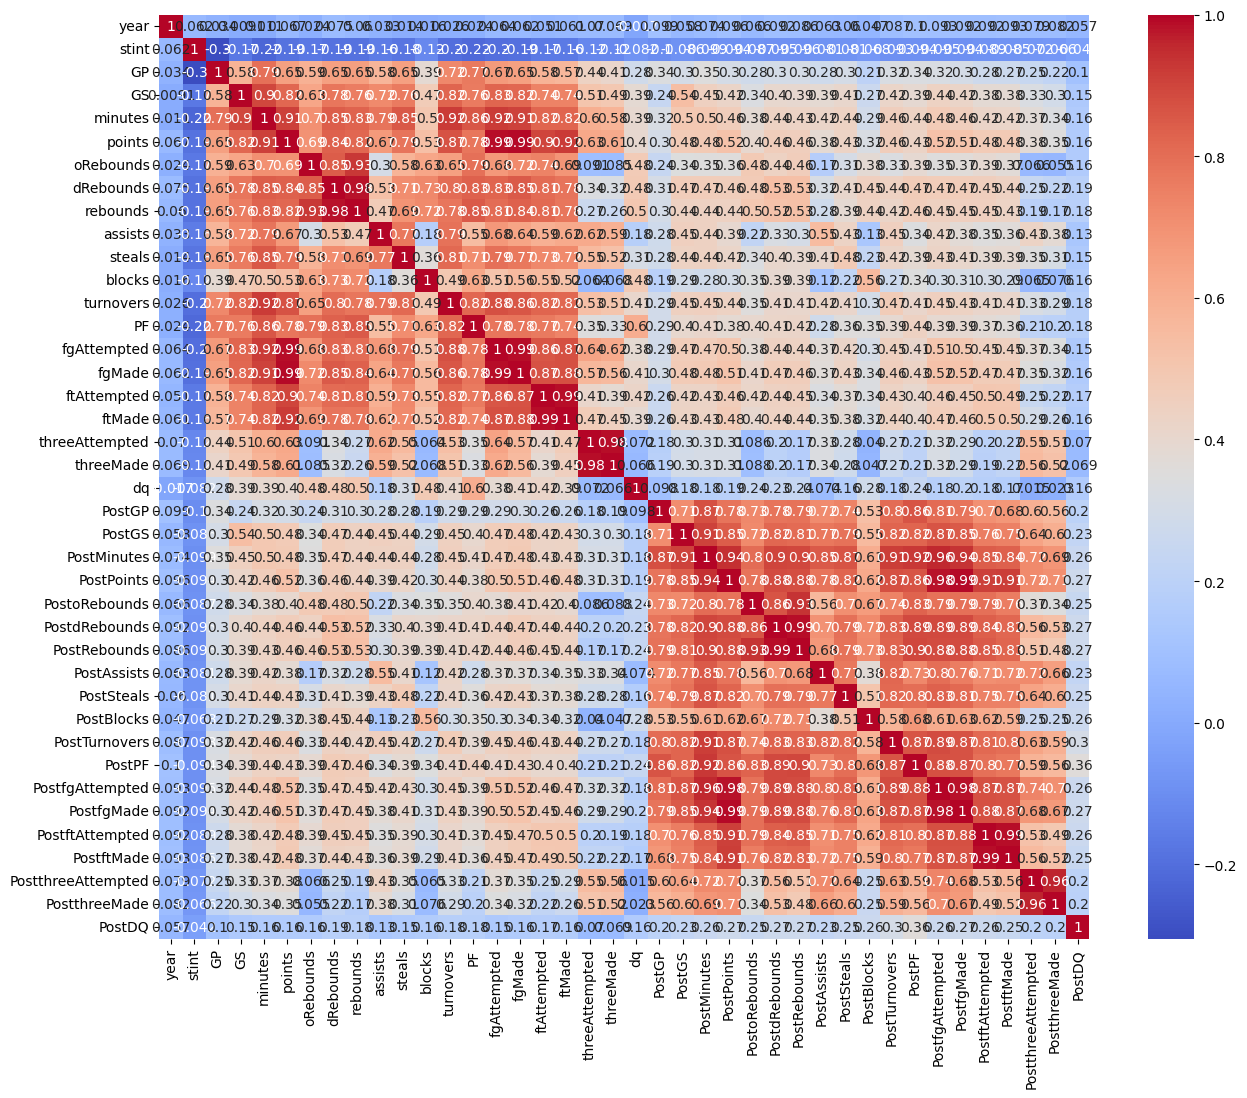

In [20]:
# Calculate the correlation matrix
correlation_matrix = players_teams_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Players_teams info

lgid is always 'WNBA'
No null values were detected


## Players

Basic Info

In [53]:
# Display the first few rows of the dataset
#print(players_df.head())

# Get information about the columns and data types (missing values)
print(players_df.info())

# Get basic statistics of numerical columns
print(players_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bioID         893 non-null    object 
 1   pos           815 non-null    object 
 2   firstseason   893 non-null    int64  
 3   lastseason    893 non-null    int64  
 4   height        893 non-null    float64
 5   weight        893 non-null    int64  
 6   college       726 non-null    object 
 7   collegeOther  11 non-null     object 
 8   birthDate     893 non-null    object 
 9   deathDate     893 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 69.9+ KB
None
       firstseason  lastseason      height      weight
count        893.0       893.0  893.000000  893.000000
mean           0.0         0.0   65.500560  145.415454
std            0.0         0.0   20.940425   61.275703
min            0.0         0.0    0.000000    0.000000
25%            0.0         0.0   68.

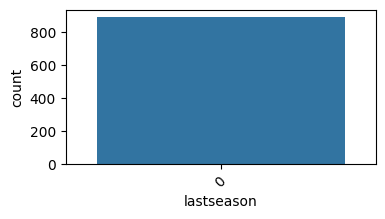

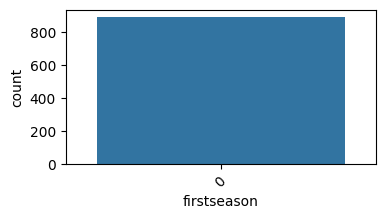

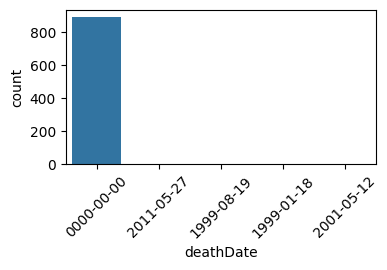

In [54]:
# Plot count plots for players
plt.figure(figsize=(4, 2))
sb.countplot(x='lastseason', data=players_df)
plt.xticks(rotation=45)
plt.show()

# Plot count plots for lgID
plt.figure(figsize=(4, 2))
sb.countplot(x='firstseason', data=players_df)
plt.xticks(rotation=45)
plt.show()

# Plot count plots for lgID
plt.figure(figsize=(4, 2))
sb.countplot(x='deathDate', data=players_df)
plt.xticks(rotation=45)
plt.show()



C:\Users\Utilizador\AppData\Local\Temp\ipykernel_14736\2297636703.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = players_df.corr()


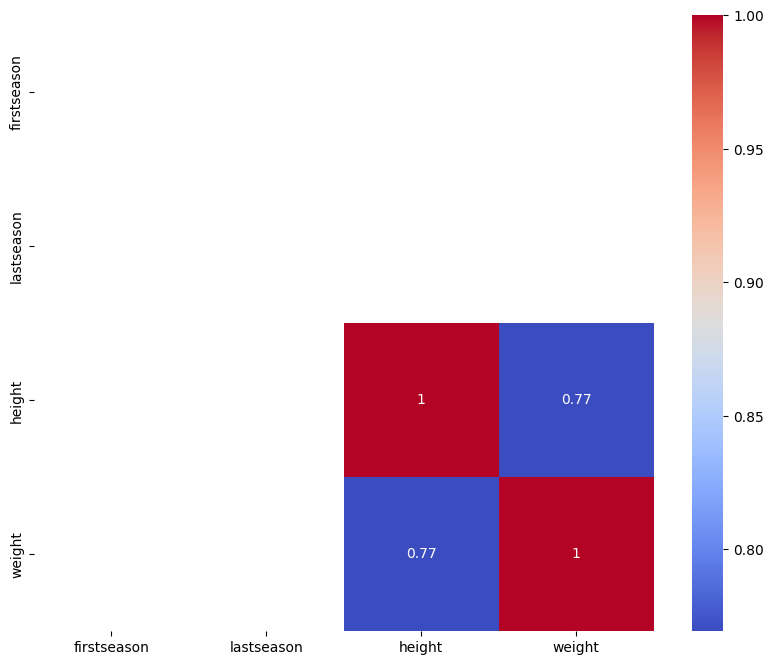

In [21]:
# # Calculate the correlation matrix
# correlation_matrix = players_df.corr()

# # Plot a heatmap of the correlation matrix
# plt.figure(figsize=(10, 8))
# sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.show()

### Player info

firstSeason and lastSeason are always 0 <br>
collegeOther only has 11 entries the rest is null (a lot of null vals)<br>
deathDate is almost always 0000-00-00 and seems irrelevant to the study<br>
pos and College have some missing values



# Teams Table

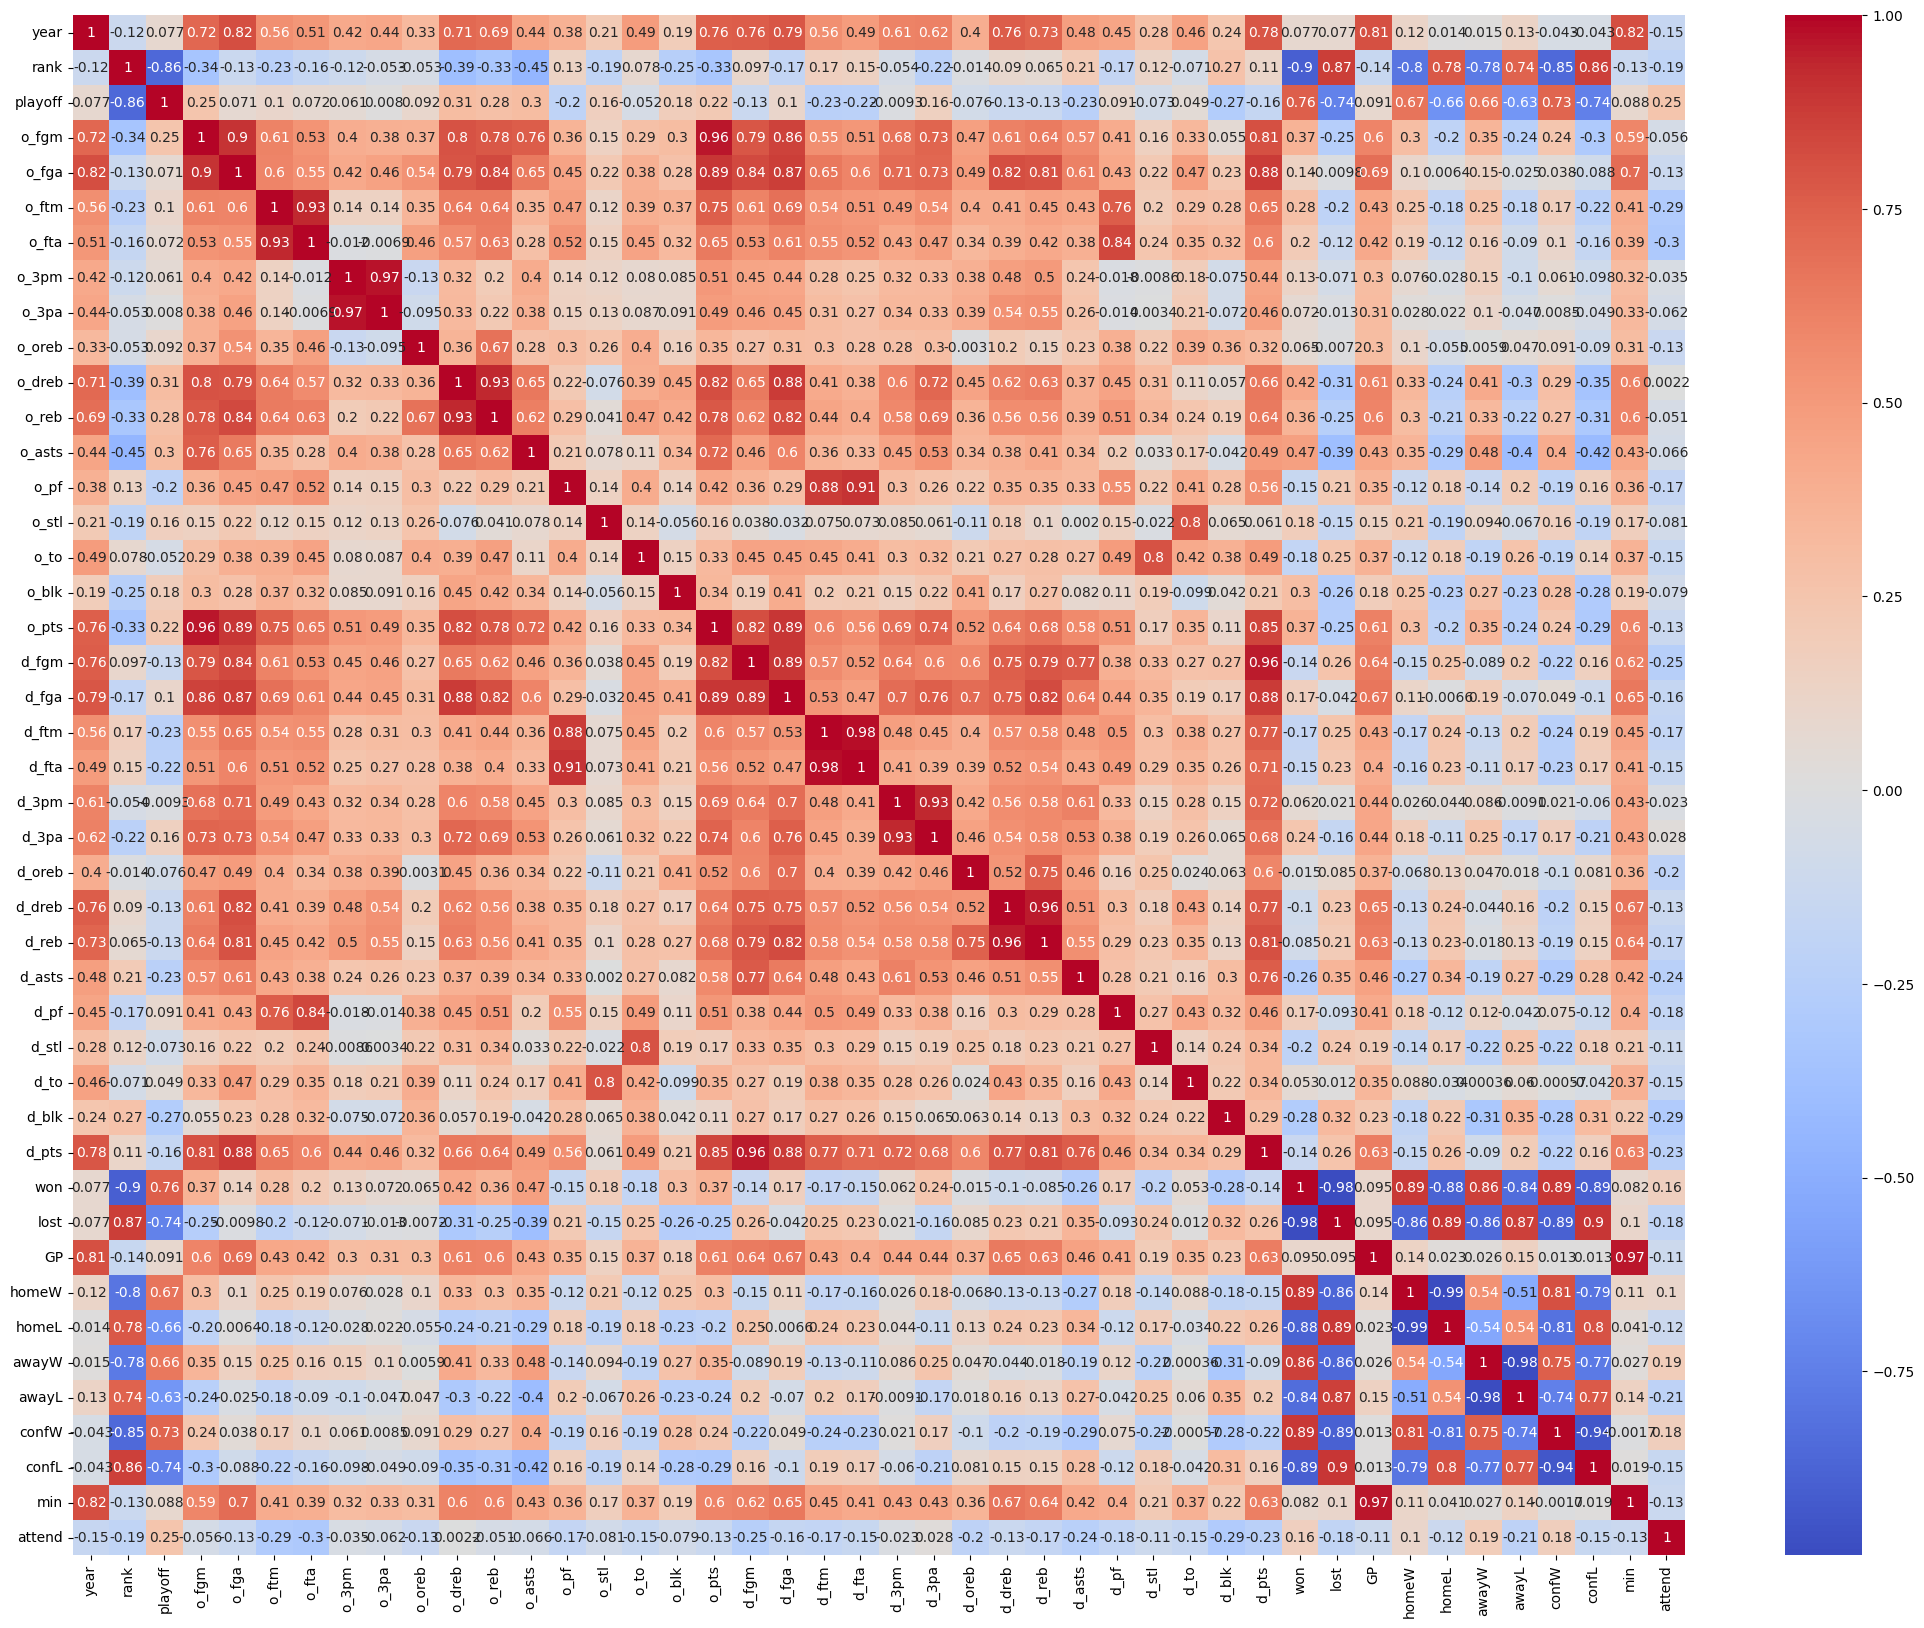

In [4]:
teams_df['playoff'] = teams_df['playoff'].eq('Y').mul(1)

# only the numeric values
teams_df_numeric = teams_df.select_dtypes(include='number')

to_drop = []
for column in teams_df_numeric.columns:
    if (column == 'divID') or (teams_df_numeric[column] == 0).all():
        to_drop.append(column)

teams_df_numeric.drop(columns=to_drop, inplace=True)

plt.figure(figsize=(26, 20))
sb.heatmap(teams_df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Teams Playoff Appearances
playoff_teams = teams_df[teams_df['playoff'] == 1]
playoff_counts = playoff_teams['tmID'].value_counts().reset_index()
playoff_counts.columns = ['Team', 'Playoff Appearances']
playoff_counts

,Team,Playoff Appearances
0,LAS,9
1,SAC,8
2,DET,7
3,NYL,7
4,SEA,7
5,CON,6
6,HOU,6
7,IND,6
8,WAS,5
9,SAS,3


# Teams Post Table

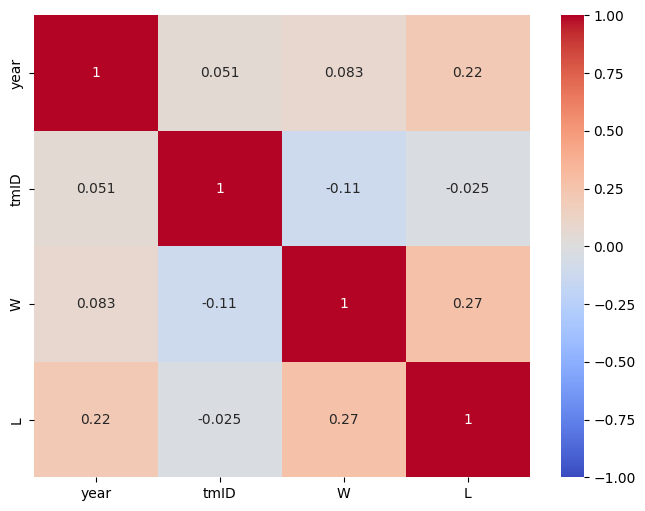

In [8]:
teams_post_df_aux = teams_post_df.copy()
teams_post_df_aux['tmID'] = teams_post_df_aux['tmID'].astype('category').cat.codes

teams_post_df_aux = teams_post_df_aux.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sb.heatmap(teams_post_df_aux.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

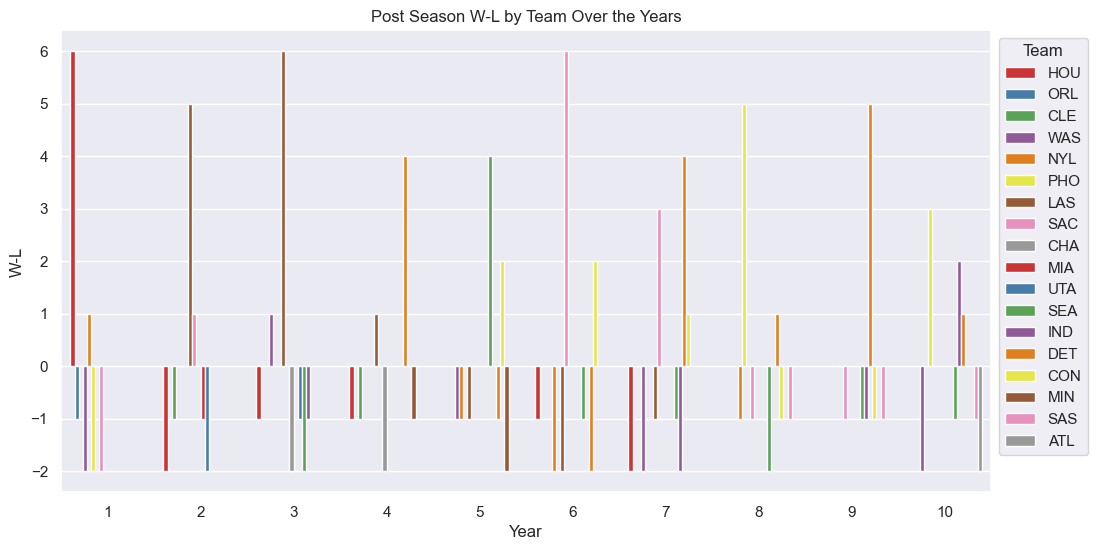

In [9]:
teams_post_df['W-L'] = teams_post_df['W'] - teams_post_df['L'] 

"""Point Graph"""
# sb.set(style="darkgrid")
# plt.figure(figsize=(12, 6))
# sb.lineplot(data=teams_post_df, x='year', y='W/L', hue='tmID', marker="o", markersize=8, dashes=False, palette='Set1')
# plt.xlabel('Year')
# plt.ylabel('Wins/Losses')
# plt.title('Wins by Team Over the Years')
# plt.legend(title='Team', loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()

"""Bar Graph"""
sb.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sb.barplot(data=teams_post_df, x='year', y='W-L', hue='tmID', palette='Set1')
plt.xlabel('Year')
plt.ylabel('W-L')
plt.title('Post Season W-L by Team Over the Years')
plt.legend(title='Team', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Series Post Table

In [11]:
# PlayOffs winning teams:
playoff_wins_df = series_post_df[series_post_df['round'] == 'F']
playoff_wins = playoff_wins_df.groupby('tmIDWinner').size().reset_index(name='PlayOffWins').sort_values(by='PlayOffWins',ascending=False)

playoff_wins

,tmIDWinner,PlayOffWins
0,DET,3
2,LAS,2
3,PHO,2
1,HOU,1
4,SAC,1
5,SEA,1
